# iloc, loc & ix 기본

> 2022/7 수정

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

## 인덱싱

 - 전통적인 행 라벨과 값 상태를 이용할 수 있다.
 - `.loc[]` 를 사용해 라벨 지향과 `.iloc[]` 로 위치 값 기반

슬라이싱은 `.loc[]` 로 레이블 지향과 `.iloc[]` 로 인덱스 위치 슬라이싱을 사용할 때는 ,두 가지 명시적인 슬라이싱 방법과  세 번째 일반 슬라이싱 방법이 있다.

1. 위치 지향(Python 슬라이싱 스타일: 끝 제외)
2. 레이블 지향(비-파이톤 슬라이싱 스타일: 끝 포함)
3. 일반(슬라이싱 스타일 : 슬라이스에 레이블 또는 위치가 포함되어 있는지 여부에 따라 다름)

# 데이터 선택 방법

Panda dataframe 에서 데이터를 선택해 추출하는데 여러 방법이있다.

1. iloc :  인덱스 위치 값 (row 번호)
1. .loc: 레이블, 조건 필터
1. .ix : 위치 값과 레이블 (pandas v0.20.1 이후 제거)

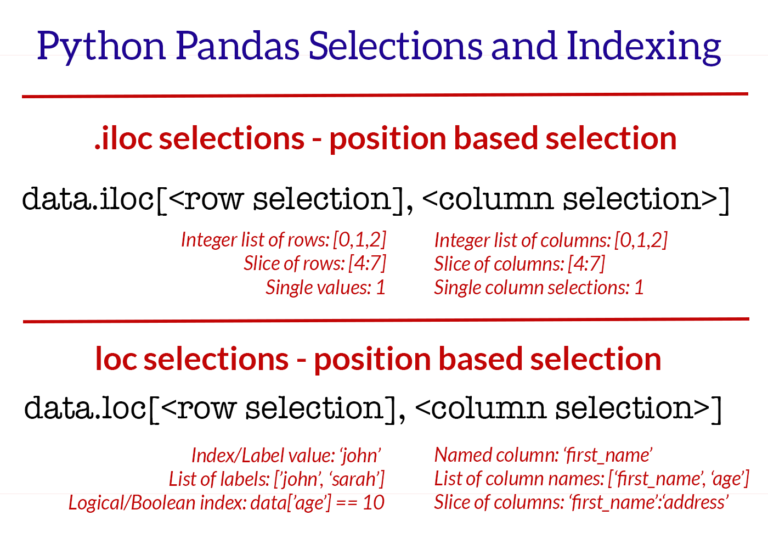

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

df2020 = pd.read_csv('data/marcap-2020.csv.gz')
df2020.head(3)

## 1. `iloc[]` 사용

인덱스 순서 값으로 행과 열을 선택하는 방법이다.

```python
Dataframe.iloc[<row selection>, <column selection>]
 - 한 행 선택되면 Series 객체
 - 여러 행 선택되면 DataFrame 객체
```

행 선택

In [ ]:
df2020.iloc[0] # 첫번째 행

In [ ]:
df2020.iloc[134] # 134번째 행

In [ ]:
df2020.iloc[-1] # 마지막 행

열 선택

In [ ]:
df2020.iloc[:, 0] # 첫번째 컬럼

In [ ]:
df2020.iloc[:, 5] # 5번째 컬럼

In [ ]:
df2020.iloc[:, -1] # 마지막 컬럼

In [ ]:
# 잘못된 컬럼번호와 라벨로 사용시 에러!!!!
df2020.iloc[:, 19]

In [ ]:
df2020.iloc[:, "Marcap"]

여러 컬ㄹ럼과 행을 선택

In [ ]:
df2020.iloc[1:4]

In [ ]:
df2020.iloc[:, 0:4][:3]

In [ ]:
# 1st, 4th, 7th, 25th rows + 1,6,7 column
df2020.iloc[[0,3,6,24], [0,5,6]]

## `.loc[]` 사용

1. 행을 라벨과 인덱스로 선택
1. 불리언 상태와 조건 탐색으로 선택

```python
Dataframe.loc[<row selection>, <column selection>]
 - 한 행 선택되면 Series 객체
 - 여러 행 선택되면 DataFrame 객체
```

In [ ]:
df2020.head(3)

### 1) 행을 라벨과 인덱스로 선택

In [ ]:
# 인덱스 라벨
df2020.loc[10]  # 인덱스 10번

In [ ]:
df2020.set_index(['Code']).loc[['005930']][:4]

In [ ]:
df2020.set_index(['Name']).loc[['삼성전자']][:4]

In [ ]:
df2020.set_index(['Name']).loc[['삼성전자'], 'Open':'Low'][:4]

In [ ]:
df2020.set_index(['Name']).loc[['삼성전자'], ['Open','Low','High']][:4]

### 2) 불리언 상태와 조건 탐색으로 선택

- [Boolean indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing)

In [ ]:
df2020.loc[df2020['Name'] == '삼성전자'][:2]

In [ ]:
# 선택한 여러 컬럼 - Dataframe
df2020.loc[df2020['Name'] == '삼성전자', ['Name','Code','Close']][:2]

컬럼 항목에서 이름만 쓰는냐 [] 리스트로 제공하느냐에 따라 Series, Dataframe 반환

In [ ]:
# Series 객체
df2020.loc[df2020['Name'] == '삼성전자', 'Code'][:2]

In [ ]:
# Dataframe 객체
df2020.loc[df2020['Name'] == '삼성전자', ['Code']][:2]

In [ ]:
df2020.loc[df2020['Name'] == '삼성전자', 'Name':'Close'][:2]

In [ ]:
df2020.loc[df2020['Name'].str.endswith("주"), 'Code':'Close'][:2]

In [ ]:
df2020.loc[df2020['Name'].isin(['셀트리온','셀트리온제약']), 'Code':'Close'][:2]

`&`, `|` 결합

In [ ]:
df2020.loc[df2020['Name'].str.contains('신') & (df2020.Close > 100000) ][:2]

In [ ]:
df2020.loc[(df2020['Date'] >= '2020-04-01') & (df2020['Date'] <= '2020-05-30'), ['Name', 'Close']][:10]

#### lambda 적용

In [ ]:
df2020.loc[df2020['Name'].apply(lambda x: len(x.split(' '))== 2)][:4]